In [8]:
import cv2
import numpy as np

In [9]:
img = cv2.imread('./images/garden-of-words-screenshot-032.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Corners

In [3]:
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

In [4]:
dst =  cv2.dilate(dst, None)

In [5]:
img[dst>0.01*dst.max()]=[0,0,255]

In [6]:
while(1):
    cv2.imshow('dst', img)
    k = cv2.waitKey(5) & 0xFF
    if k== 27:
        break
        
cv2.destroyAllWindows()

# Basic Image and Video

In [3]:
px = img[100, 100]
px

array([255, 255, 255], dtype=uint8)

In [4]:
img.shape

(1080, 1920, 3)

In [5]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
# print(flags)

In [11]:
cap = cv2.VideoCapture(0)
while(1):

    # Take each frame
    _, frame = cap.read()

    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # define range of blue color in HSV
    lower_blue = np.array([98,50,50])
    upper_blue = np.array([112,255,255])
    
    lower_red = np.array([0,50,50])
    upper_red = np.array([171,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

#     Threshold the HSV image to get only red colors
    mask2 = cv2.inRange(hsv, lower_red, upper_red)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
        
cv2.destroyAllWindows()
cap.release()

In [23]:
# Converter Function
# BGR to HSV
lower_red = np.uint8([[[0,77,255]]])
upper_red = np.uint8([[[77, 0, 255]]])
hsv_lower_red = cv2.cvtColor(lower_red,cv2.COLOR_BGR2HSV)
hsv_upper_red = cv2.cvtColor(upper_red, cv2.COLOR_BGR2HSV)

print(hsv_lower_red)
print(hsv_upper_red)


[[[  9 255 255]]]
[[[171 255 255]]]


In [6]:
small_edge = min(img.shape[:2])
ratio = 360 / small_edge
ratio
height,width = img.shape[:2]

In [9]:
# res = cv2.resize(img, (int(ratio * width), int(ratio * height)), interpolation =  cv2.INTER_CUBIC)

res = cv2.resize(img, None, fx = ratio, fy = ratio, interpolation = cv2.INTER_CUBIC)

In [10]:
while(1):
    cv2.imshow('res', res)
    k = cv2.waitKey(5) & 0xFF
    if k== 27:
        break
        
cv2.destroyAllWindows()

In [33]:
cv2.imshow('img', img)

# Corner with SubPixel Accuracy

In [27]:
#Assume cv2 is imported and image is stored in img gray image is stored in gray
#Find Harris Corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4,9, 0.05)
dst = cv2.dilate(dst, None)
ret, dst = cv2.threshold(dst, 0.01*dst.max(), 255, 0)
dst = np.uint8(dst)

In [28]:
#Find Centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

In [29]:
# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [30]:
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]


In [31]:
while(1):
    cv2.imshow('img', img)
    k = cv2.waitKey(5) & 0xFF
    if k== 27:
        break
        
cv2.destroyAllWindows()

# Shi Tomasi Method

In [33]:
from matplotlib import pyplot as plt

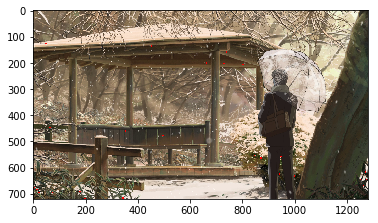

(<matplotlib.image.AxesImage at 0x7faa45d32358>, None)

In [34]:
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img),plt.show()